# C10H12 (pi system)

[([0, 1], [2, 3]), ([0, 1], [4, 5]), ([0, 1], [6, 7]), ([0, 1], [8, 9]), ([0, 1], [10, 11]), ([0, 1], [12, 13]), ([0, 1], [14, 15]), ([0, 1], [16, 17]), ([0, 1], [18, 19]), ([2, 3], [4, 5]), ([2, 3], [6, 7]), ([2, 3], [8, 9]), ([2, 3], [10, 11]), ([2, 3], [12, 13]), ([2, 3], [14, 15]), ([2, 3], [16, 17]), ([2, 3], [18, 19]), ([4, 5], [6, 7]), ([4, 5], [8, 9]), ([4, 5], [10, 11]), ([4, 5], [12, 13]), ([4, 5], [14, 15]), ([4, 5], [16, 17]), ([4, 5], [18, 19]), ([6, 7], [8, 9]), ([6, 7], [10, 11]), ([6, 7], [12, 13]), ([6, 7], [14, 15]), ([6, 7], [16, 17]), ([6, 7], [18, 19]), ([8, 9], [10, 11]), ([8, 9], [12, 13]), ([8, 9], [14, 15]), ([8, 9], [16, 17]), ([8, 9], [18, 19]), ([10, 11], [12, 13]), ([10, 11], [14, 15]), ([10, 11], [16, 17]), ([10, 11], [18, 19]), ([12, 13], [14, 15]), ([12, 13], [16, 17]), ([12, 13], [18, 19]), ([14, 15], [16, 17]), ([14, 15], [18, 19]), ([16, 17], [18, 19])]
Number of pairs: 45
[2.495557128493176, 0.000696961769740323, 0.014243323048559908, 5.7012337677520

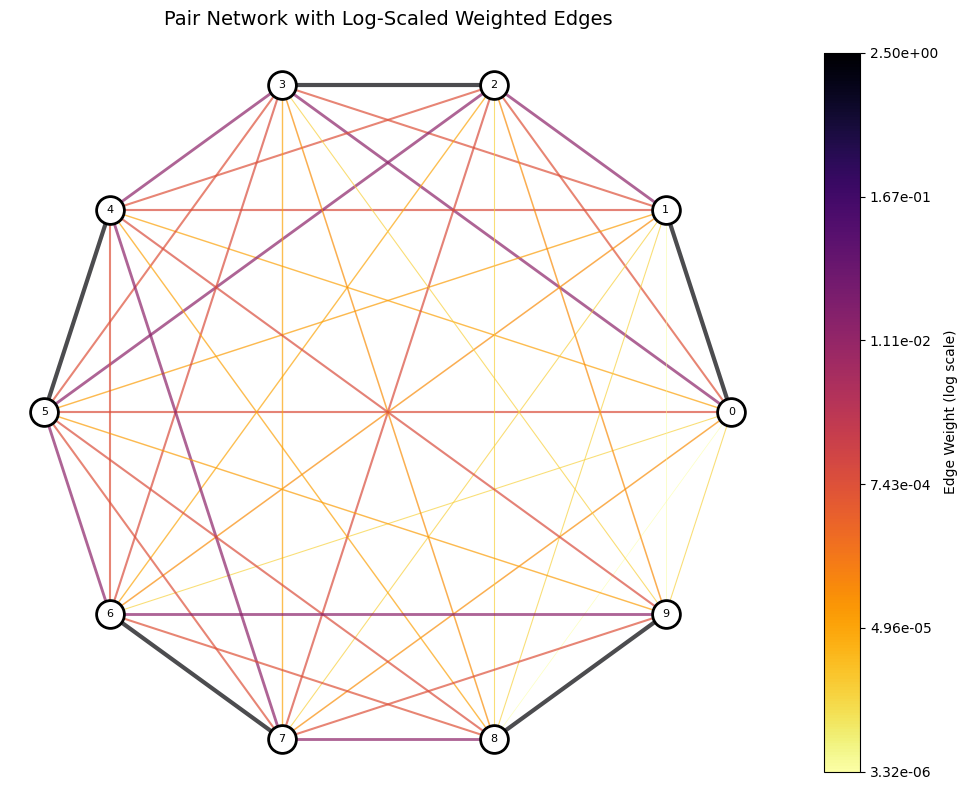

In [10]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np

def generate_pairs():
    segments = [[i, i+1] for i in range(0, 19, 2)]
    return [(segments[i], segments[j]) for i in range(len(segments)) for j in range(i + 1, len(segments))]

def plot_pairs_with_weights(pairs, weights):
    # Get all unique segments (nodes)
    nodes = [[i, i+1] for i in range(0, 19, 2)]
    node_labels = {tuple(node): str(i) for i, node in enumerate(nodes)}
    
    # Create positions for nodes in a circle
    n = len(nodes)
    angles = np.linspace(0, 2 * np.pi, n, endpoint=False)
    pos = {tuple(nodes[i]): (np.cos(angles[i]), np.sin(angles[i])) for i in range(n)}
    
    # Apply log transformation to weights for better visualization
    # Filter out zero weights and apply log
    log_weights = []
    for w in weights:
        if w > 0:
            log_weights.append(np.log(w))
            # log_weights.append(w)
        else:
            log_weights.append(np.log(1e-10))  # Small value for zeros
    
    # Normalize log-transformed weights for color mapping
    min_log = min(log_weights)
    max_log = max(log_weights)
    norm = mcolors.Normalize(vmin=min_log, vmax=max_log)
    cmap = plt.cm.inferno_r
    # cmap = plt.cm.Reds
    
    fig, ax = plt.subplots(figsize=(12, 8))
    
    # Draw edges with colors based on log-scaled weights
    for (seg1, seg2), weight, log_weight in zip(pairs, weights, log_weights):
        color = cmap(norm(log_weight))
        p1 = pos[tuple(seg1)]
        p2 = pos[tuple(seg2)]
        # Also vary linewidth slightly based on weight
        linewidth = 0.5 + 2.5 * (log_weight - min_log) / (max_log - min_log)
        ax.plot([p1[0], p2[0]], [p1[1], p2[1]], color=color, linewidth=linewidth, alpha=0.7)
    
    # Draw nodes
    for node in nodes:
        p = pos[tuple(node)]
        ax.plot(p[0], p[1], 'o', color='white', markersize=20, markeredgecolor='black', markeredgewidth=2)
        ax.text(p[0], p[1], node_labels[tuple(node)], ha='center', va='center', fontsize=8)
    
    # Add colorbar with log scale
    sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
    sm.set_array([])
    cbar = plt.colorbar(sm, ax=ax, label='Edge Weight (log scale)')
    
    # Add actual weight values to colorbar ticks
    log_ticks = np.linspace(min_log, max_log, 6)
    cbar.set_ticks(log_ticks)
    cbar.set_ticklabels([f'{np.exp(t):.2e}' for t in log_ticks])
    
    ax.set_aspect('equal')
    ax.axis('off')
    ax.set_title('Pair Network with Log-Scaled Weighted Edges', fontsize=14, pad=20)
    plt.tight_layout()
    plt.show()

# Example usage:
if __name__ == "__main__":
    pairs = generate_pairs()
    print(pairs)
    print(f"Number of pairs: {len(pairs)}")
    
    weights = [
        2.495557128493176, 0.000696961769740323, 0.014243323048559908, 5.701233767752001e-05, 0.0008210794619030182, 1.4599131050285763e-05, 9.594905150267508e-05, 3.3156810559376027e-06, 1.4999528278547558e-05,
        0.014731047730134339, 0.0007296665159142179, 0.0008683019341115816, 6.17436709049457e-05, 0.00010148299484491474, 1.580036716353206e-05, 1.500839935575371e-05, 3.768035475193443e-06,
        2.467667152969747, 0.000731034711346723, 0.014754764794171482, 5.11648581502655e-05, 0.0008593434947399281, 1.4741370264470532e-05, 0.00010242191822085189,
        0.014796509102337652, 0.0007308189171983948, 0.0008587927726857458, 5.227055709955408e-05, 9.681092770907895e-05, 1.59946809965561e-05,
        2.4667957059955734, 0.0007298850437256199, 0.01477768387649947, 5.73526010949621e-05, 0.0008755117265546453,
        0.014736981697708984, 0.0007296945906558605, 0.0008280162265408286, 6.256203651222592e-05,
        2.4676577214341453, 0.0006994200746612833, 0.014870797920560452,
        0.014377866664008643, 0.0007358320946742047,
        2.49090998606744
    ]
    
    # Pad with zeros if needed
    weights.extend([1e-10] * (len(pairs) - len(weights)))
    print(weights)
    
    print(f"Weight range: {min([w for w in weights if w > 0]):.2e} to {max(weights):.6f}")
    print(f"Example: 0.01424 vs 5.7e-05")
    print(f"  Linear: would look almost identical")
    print(f"  Log: {np.log(0.01424):.2f} vs {np.log(5.7e-05):.2f} - clear difference!")
    
    plot_pairs_with_weights(pairs, weights)

In [11]:
keys = pairs
values = weights

# Convert [0,1] to 0, [2,3] to 1, [4,5] to 2, etc.
def convert_pair(pair):
    return pair[0] // 2

# Convert keys to simple integer tuples
keys_converted = [tuple(convert_pair(sublist) for sublist in key) for key in keys]

# Create dictionary
data_dict = dict(zip(keys_converted, values))

# Sort by descending values
sorted_dict = dict(sorted(data_dict.items(), key=lambda x: x[1], reverse=True))

# Print the sorted dictionary
for key, value in sorted_dict.items():
    print(f"{key}: {value}")

(0, 1): 2.495557128493176
(8, 9): 2.49090998606744
(2, 3): 2.467667152969747
(6, 7): 2.4676577214341453
(4, 5): 2.4667957059955734
(6, 9): 0.014870797920560452
(3, 4): 0.014796509102337652
(4, 7): 0.01477768387649947
(2, 5): 0.014754764794171482
(5, 6): 0.014736981697708984
(1, 2): 0.014731047730134339
(7, 8): 0.014377866664008643
(0, 3): 0.014243323048559908
(4, 9): 0.0008755117265546453
(1, 4): 0.0008683019341115816
(2, 7): 0.0008593434947399281
(3, 6): 0.0008587927726857458
(5, 8): 0.0008280162265408286
(0, 5): 0.0008210794619030182
(7, 9): 0.0007358320946742047
(2, 4): 0.000731034711346723
(3, 5): 0.0007308189171983948
(4, 6): 0.0007298850437256199
(5, 7): 0.0007296945906558605
(1, 3): 0.0007296665159142179
(6, 8): 0.0006994200746612833
(0, 2): 0.000696961769740323
(2, 9): 0.00010242191822085189
(1, 6): 0.00010148299484491474
(3, 8): 9.681092770907895e-05
(0, 7): 9.594905150267508e-05
(5, 9): 6.256203651222592e-05
(1, 5): 6.17436709049457e-05
(4, 8): 5.73526010949621e-05
(0, 4): 5.